<b>This notebook analyses senders, repliers and interactions.</b>

What it does:
-it computes and plots the top-senders (= people sending mails), top-repliers (= people replying to mails), top-dyads (= interaction between repliers and receivers)

Parameters to set options:
-set how many top senders / repliers / dyads to print and plot, by setting the variables 'n_top_senders', 'n_top_repliers', 'n_top_dyads'


In [1]:
%matplotlib inline

In [2]:
import bigbang.mailman as mailman
import bigbang.graph as graph
import bigbang.process as process
from bigbang.parse import get_date
from bigbang.archive import Archive
import bigbang.twopeople as twoppl
reload(process)
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import pytz
import pickle
import os
pd.options.display.mpl_style = 'default' # pandas has a set of preferred graph formatting options

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#insert one or more urls of the mailing lists you want to include in the analysis
#(if more mailing lists are included, the data are aggregated and treated as a single object of analysis)

urls = ["http://mm.icann.org/pipermail/cc-humanrights/", 
        "http://mm.icann.org/pipermail/wp4/", 
        "http://mm.icann.org/pipermail/ge/"]


archives= [mailman.open_list_archives(url) for url in urls]
archives = pd.concat(archives)

Opening 19 archive files
Opening 5 archive files
Opening 19 archive files


Let's compute and plot the top senders

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


From
rafik.dammak at gmail.com (Rafik Dammak)                    33.0
stephanie.perrin at mail.utoronto.ca (Stephanie Perrin)     35.0
mariliamaciel at gmail.com (Marilia Maciel)                 47.0
maryam.bakoshi at icann.org (Maryam Bakoshi)                62.0
niels at article19.org (Niels ten Oever)                   189.0
dtype: float64


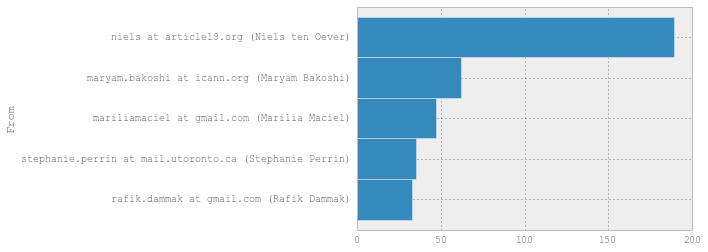

In [145]:
#compute and plot top senders (people sending out emails)


#set the number of top senders to be displayed
n_top_senders = 5




activity = Archive.get_activity(Archive(archives))
tot_activity = activity.sum(0)
tot_activity.sort()
print tot_activity[-n_top_senders:]
tot_activity[-n_top_senders:].plot(kind = 'barh', width = 1)

In [111]:
#compute replies list (sender+replier)
arc_data = Archive(archives).data
from_users = arc_data[['From']]
to_users = arc_data[arc_data['In-Reply-To'] > 0][['From','Date','In-Reply-To']]
replies = pd.merge(from_users, to_users, how='inner', 
                   right_on='In-Reply-To',left_index=True,
                   suffixes=['_original','_response'])

Let's compute and plot the top repliers

wjdrake at gmail.com (William Drake)  11
tatiana.tropina at gmail.com (Tatiana Tropina)  12
avri at acm.org (Avri Doria)  14
Lee.HIBBARD at coe.int (HIBBARD Lee)  15
mshears at cdt.org (Matthew Shears)  17
michele at blacknight.com (Michele Neylon - Blacknight)  21
rafik.dammak at gmail.com (Rafik Dammak)  30
mariliamaciel at gmail.com (Marilia Maciel)  32
stephanie.perrin at mail.utoronto.ca (Stephanie Perrin)  35
niels at article19.org (Niels ten Oever)  91


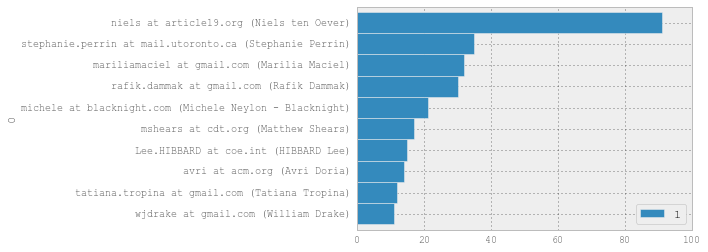

In [117]:
#compute and plot top repliers (people responding to mails)


#set the number of top repliers to be displayed
n_top_repliers = 10




from collections import defaultdict
repliers_count = defaultdict(int)
for reply in replies['From_response']:
    repliers_count[reply] += 1
repliers_count = sorted(repliers_count.iteritems(), key = lambda (k,v):(v,k))
for replier_count in repliers_count[-n_top_repliers:]:
    print replier_count[0]+'  '+str(replier_count[1]) 
repliers_count = pd.DataFrame.from_records(repliers_count, index = 0)
repliers_count[-n_top_repliers:].plot(kind = 'barh', width = 1)

Let's compute and plot the top-dyads

In [10]:
#compute and plot top dyads (pairs of replier-receiver)


#select the number of top dyads to be desplayed
n_top_dyads = 10



dyads = twoppl.panda_allpairs(replies, twoppl.unique_pairs(replies))
dyads = dyads.sort("num_replies", ascending = False)
print dyads[:n_top_dyads]["A"]+' '+dyads[:n_top_dyads]["B"]+' '+str(dyads[:n_top_dyads]["num_replies"])
dyads['dyad'] = dyads['A']+dyads['B']
dyads[:n_top_dyads].plot(kind = 'barh', width = 1, x = 'dyad', y = 'num_replies')

NameError: name 'replies' is not defined